In [ ]:
    import wget
    import os
    import zipfile
    
    import urllib3
    import certifi
    import sys
    import glob
    
    import numpy as np
    import pandas as pd
    
    import matplotlib.pyplot as plt
    
    %matplotlib inline


    import plotly.offline as py
    import plotly.graph_objs as go
    import plotly.tools as tls
    import seaborn as sns
    
    import plotly
    plotly.offline.init_notebook_mode()

In [ ]:
df = pd.read_csv("italy_earthquakes_from_2016-08-24_to_2016-11-30.csv")
df.head()

In [ ]:
df['Day'], df['Time'] = zip(*df.Time.str.split())

In [ ]:
df.head()

In [ ]:
df['Year'], df['B'] = df['Day'].str.split('-', 1).str
df['Month'], df['Day'] = df['B'].str.split('-', 1).str

In [ ]:

del df['B']
df.head()



In [ ]:
df['Month'] = df['Month'].map({'08': 8, '09': 9, "10":10, "11":11})

In [ ]:
df.Month

In [23]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
earth = np.genfromtxt("italy_earthquakes_from_2016-08-24_to_2016-11-30.csv",
                         delimiter=',', 
                         dtype=[('Latitude', np.float32), ('Longitude', np.float32)], 
                         usecols=(1, 2))

fig = plt.figure()

In [24]:
themap = Basemap(projection='merc', 
              llcrnrlon = 6,              # lower-left corner longitude
              llcrnrlat = 36,               # lower-left corner latitude
              urcrnrlon = 19,               # upper-right corner longitude
              urcrnrlat = 49,               # upper-right corner latitude
              resolution = 'h',
              area_thresh = 0.1,
              )


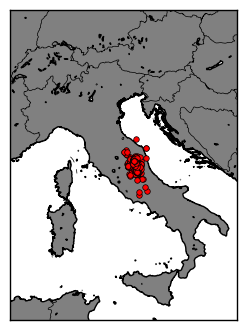

In [25]:
themap.drawcoastlines()
themap.drawcountries()
themap.fillcontinents(color = 'gray')
themap.drawmapboundary()
themap.drawmeridians(np.arange(0, 360, 30))
themap.drawparallels(np.arange(-90, 90, 30))
x, y = themap(earth['Longitude'], earth['Latitude'])
themap.plot(x, y, 
            'o',                    # marker shape
            color='red',         # marker colour
            markersize=4,  
           
            )

plt.show()
 

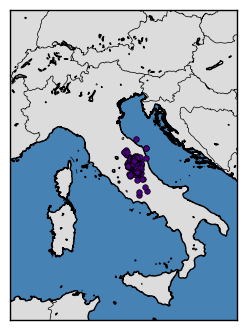

In [26]:
themap.drawcoastlines()
themap.drawcountries()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')
x, y = themap(earth['Longitude'], earth['Latitude'])
themap.plot(x, y, 
            'o',                    # marker shape
            color='Indigo',         # marker colour
            markersize=4,  
           
            )

plt.show()

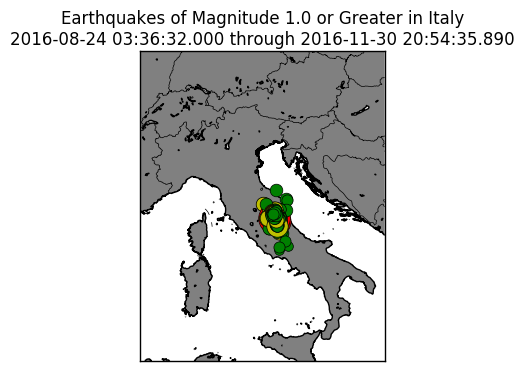

In [16]:
import csv

# Open the earthquake data file.
filename = 'italy_earthquakes_from_2016-08-24_to_2016-11-30.csv'

# Create empty lists for the data we are interested in.
lats, lons = [], []
magnitudes = []
timestrings = []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        magnitudes.append(float(row[4]))
        timestrings.append(row[0])
        
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')
 
eq_map = Basemap(projection='merc', 
              llcrnrlon = 6,                # lower-left corner longitude
              llcrnrlat = 37,               # lower-left corner latitude
              urcrnrlon = 19,               # upper-right corner longitude
              urcrnrlat = 49,               # upper-right corner latitude
              resolution = 'h',
              area_thresh = 0.1,
              )
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 2.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)

title_string = "Earthquakes of Magnitude 1.0 or Greater in Italy\n"
title_string += "%s through %s" % (timestrings[0], timestrings[-1])
plt.title(title_string)
plt.show()

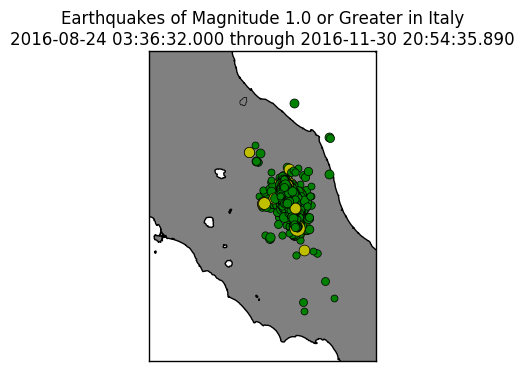

In [29]:
import csv

# Open the earthquake data file.
filename = 'italy_earthquakes_from_2016-08-24_to_2016-11-30.csv'

# Create empty lists for the data we are interested in.
lats, lons = [], []
magnitudes = []
timestrings = []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        magnitudes.append(float(row[4]))
        timestrings.append(row[0])
        
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')
 
eq_map = Basemap(projection='merc', 
              llcrnrlon = 11,                # lower-left corner longitude
              llcrnrlat = 41,               # lower-left corner latitude
              urcrnrlon = 14.5,               # upper-right corner longitude
              urcrnrlat = 44.5,               # upper-right corner latitude
              resolution = 'h',
              area_thresh = 0.1,
              )
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 2.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)

title_string = "Earthquakes of Magnitude 1.0 or Greater in Italy\n"
title_string += "%s through %s" % (timestrings[0], timestrings[-1])
plt.title(title_string)
plt.show()